# Recherche reproductible : principes méthodologiques pour une science transparente
## Travail pratique avec évaluation par les pairs

###  Sujet 1 : Concentration de CO2 dans l'atmosphère depuis 1958
Prérequis : traitement de suites chronologiques

En 1958, Charles David Keeling  a initié une mesure de la concentration de CO2 dans l'atmosphère à l'observatoire de Mauna Loa, Hawaii, États-Unis qui continue jusqu'à aujourd'hui. L'objectif initial était d'étudier la variation saisonnière, mais l'intérêt s'est déplacé plus tard vers l'étude de la tendance croissante dans le contexte du changement climatique. En honneur à Keeling, ce jeu de données est souvent appelé "Keeling Curve" (voir https://en.wikipedia.org/wiki/Keeling_Curve pour l'histoire et l'importance de ces données).

Les données sont disponibles sur le site Web de l'institut Scripps. Utilisez le fichier avec les observations hebdomadaires. Attention, ce fichier est mis à jour régulièrement avec de nouvelles observations. Notez donc bien la date du téléchargement, et gardez une copie locale de la version précise que vous analysez. Faites aussi attention aux données manquantes.

Votre mission si vous l'acceptez :
1. Réalisez un graphique qui vous montrera une oscillation périodique superposée à une évolution systématique plus lente.
2. Séparez ces deux phénomènes. Caractérisez l'oscillation périodique. Proposez un modèle simple de la contribution lente, estimez ses paramètres et tentez une extrapolation jusqu'à 2025 (dans le but de pouvoir valider le modèle par des observations futures).
3. Déposer dans FUN votre résultat

Date de téléchargement des données: 03/02/2022

### 1. Réalisez un graphique qui vous montrera une oscillation périodique superposée à une évolution systématique plus lente.

<AxesSubplot:xlabel='Date', ylabel='Concentrations [ppm]'>

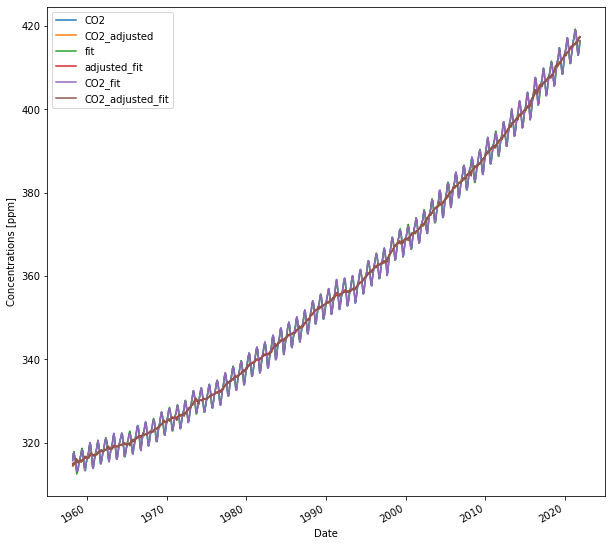

In [56]:
# Import librairies
import pandas as pd

#Load data
names = ['Years','Month','Date_Excel','Date_num','CO2','CO2_adjusted','fit','adjusted_fit','CO2_fit','CO2_adjusted_fit']
data = pd.read_csv('monthly_in_situ_co2_mlo.csv',skiprows = 57, names = names)
#Remove columns
data.drop(['Date_Excel','Date_num'], axis=1, inplace=True)
#Remove Nan values
data = data[data['CO2'] != -99.99]
data['Day'] = 1
data['Date'] = pd.to_datetime(data[['Years', 'Month','Day']])
data.set_index('Date', inplace=True)
data.drop(['Years','Month', 'Day'], axis=1, inplace=True)
data.plot(figsize=(10,10), ylabel = 'Concentrations [ppm]')

### 2. Séparez ces deux phénomènes. Caractérisez l'oscillation périodique. Proposez un modèle simple de la contribution lente, estimez ses paramètres et tentez une extrapolation jusqu'à 2025 (dans le but de pouvoir valider le modèle par des observations futures).

<AxesSubplot:xlabel='Date', ylabel='Concentrations [ppm]'>

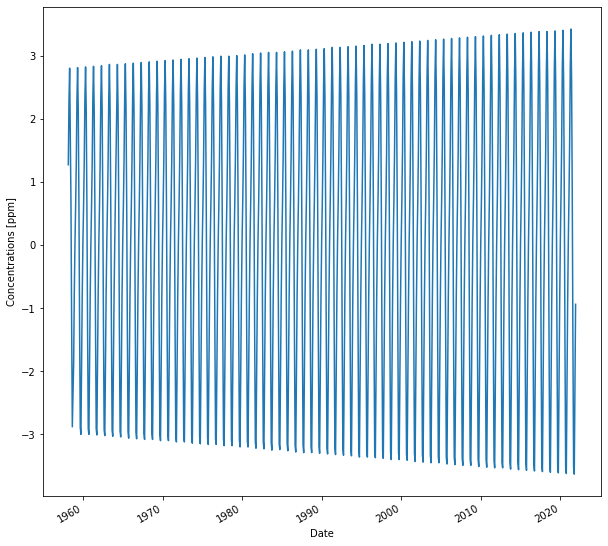

In [64]:
data['oscillation'] = data['CO2_fit'] - data['CO2_adjusted_fit']
data['oscillation'].plot(figsize=(10,10), ylabel = 'Concentrations [ppm]')

<AxesSubplot:xlabel='Date', ylabel="Amplitude de l'oscillation [m]">

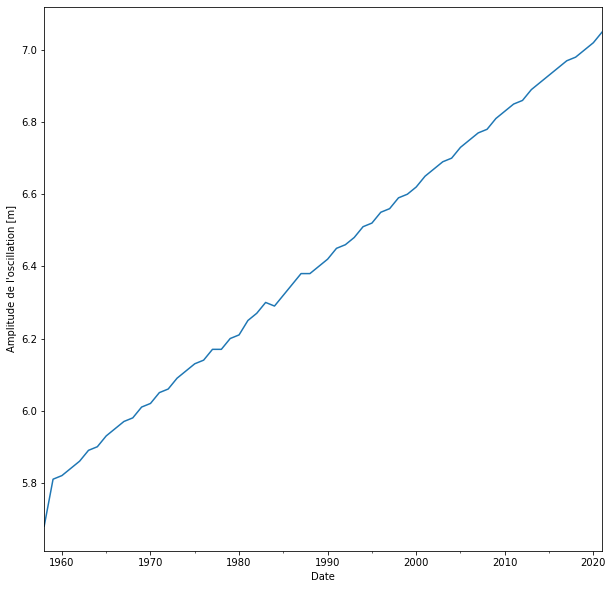

In [70]:
data_years_min = data['oscillation'].resample('Y').min()
data_years_max = data['oscillation'].resample('Y').max()
amplitude = data_years_max-data_years_min
amplitude.plot(figsize=(10,10), ylabel = "Amplitude de l'oscillation [m]")

In [85]:
# Définition du modèle d'amplitude à l'aide d'une équation linéaire y=a(x-x1)+b
x1 = 2000
b = amplitude.loc[pd.DatetimeIndex(['2000-12-31'])].values[0]
# a = (y2-y1)/(x2-x1)
a = (amplitude.loc[pd.DatetimeIndex(['2020-12-31'])].values[0]-amplitude.loc[pd.DatetimeIndex(['2000-12-31'])].values[0])/(2020-2000)

#L'amplitude de l'oscillation en 2025 sera de:
a*(2025-x1)+b

7.119999999999962

In [91]:
# Définition du modèle de la contribution lente y=a(x-x1)+b
data = data.resample('Y').max()
x1 = 2000
b = data['CO2_adjusted_fit'].loc[pd.DatetimeIndex(['2000-12-31'])].values[0]
# a = (y2-y1)/(x2-x1)
a = (data['CO2_adjusted_fit'].loc[pd.DatetimeIndex(['2020-12-31'])].values[0]-data['CO2_adjusted_fit'].loc[pd.DatetimeIndex(['2000-12-31'])].values[0])/(2020-2000)

#La contribution lente en 2025 aura une concentration en ppm de:
a*(2025-x1)+b

426.35249999999996